# Simple regression with TensorFlow

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
X = np.load("./rbfs/phi_reduce.npy")
y = np.load("./rbfs/y.npy")

(array([2.8090e+03, 4.0340e+03, 9.2550e+03, 1.3645e+04, 1.2332e+04,
        7.3420e+03, 2.0200e+03, 3.2900e+02, 4.8000e+01, 7.0000e+00]),
 array([-0.001 ,  0.0094,  0.0198,  0.0302,  0.0406,  0.051 ,  0.0614,
         0.0718,  0.0822,  0.0926,  0.103 ]),
 <BarContainer object of 10 artists>)

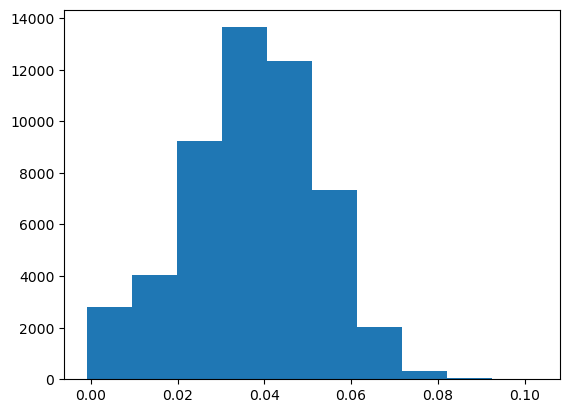

In [5]:
plt.hist(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [7]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [8]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [29]:
model = models.Sequential([
  layers.Dense(256,kernel_initializer='normal', activation='relu', input_shape=(n_feat,)),
  layers.Dense(1, activation='linear')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               51712     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 51969 (203.00 KB)
Trainable params: 51969 (203.00 KB)
Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [30]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [31]:
history=model.fit(X_train, y_train, epochs=30, 
                  batch_size=150, verbose=1, 
                  validation_split=0.2)
y_test_pred = model.predict(X_test)

Epoch 1/30
222/222 [==============================] - 0s 1ms/step - loss: 0.0206 - mae: 0.0206 - mse: 0.0013 - val_loss: 0.0202 - val_mae: 0.0202 - val_mse: 6.3276e-04
Epoch 2/30
222/222 [==============================] - 0s 1ms/step - loss: 0.0141 - mae: 0.0141 - mse: 3.1744e-04 - val_loss: 0.0160 - val_mae: 0.0160 - val_mse: 3.7811e-04
Epoch 3/30
222/222 [==============================] - 0s 1ms/step - loss: 0.0135 - mae: 0.0135 - mse: 2.8944e-04 - val_loss: 0.0199 - val_mae: 0.0199 - val_mse: 5.4788e-04
Epoch 4/30
222/222 [==============================] - 0s 917us/step - loss: 0.0135 - mae: 0.0135 - mse: 2.8811e-04 - val_loss: 0.0146 - val_mae: 0.0146 - val_mse: 3.2692e-04
Epoch 5/30
222/222 [==============================] - 0s 914us/step - loss: 0.0133 - mae: 0.0133 - mse: 2.8015e-04 - val_loss: 0.0120 - val_mae: 0.0120 - val_mse: 2.3644e-04
Epoch 6/30
222/222 [==============================] - 0s 920us/step - loss: 0.0121 - mae: 0.0121 - mse: 2.3443e-04 - val_loss: 0.0161 - val_

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


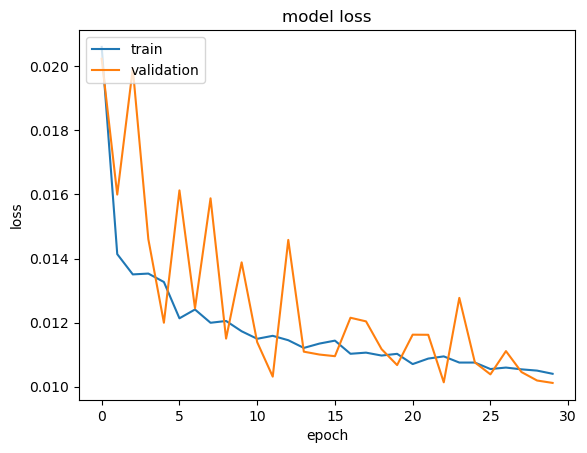

In [32]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
mean_absolute_error(y_test, y_test_pred)

0.010216271758378559

In [34]:
mean_squared_error(y_test, y_test_pred)

0.00017045938619410458

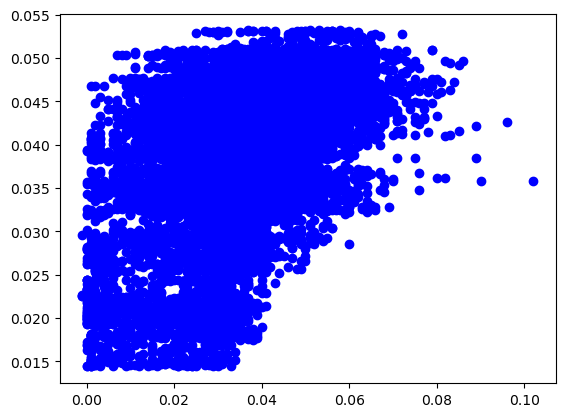

In [35]:
plt.plot(y_test, y_test_pred, 'bo')

### Tilted loss function

In [16]:
import keras.backend as Kr

In [17]:
q = 0.5
def tilted_loss(y,f):
    e1 = (y-f)
    the_sum = (Kr.mean(Kr.maximum(q*e1, (q-1)*e1), axis=-1))
    return the_sum

In [18]:
model = models.Sequential([
  layers.Dense(64,kernel_initializer='normal', activation='relu', input_shape=(n_feat,)),
  layers.Dense(1, activation='linear')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                12928     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12993 (50.75 KB)
Trainable params: 12993 (50.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the model
model.compile(loss=tilted_loss, metrics=['mae', 'mse'])

In [20]:
history=model.fit(X_train, y_train, epochs=30, 
                  batch_size=150, verbose=1, 
                  validation_split=0.2)
y_test_pred = model.predict(X_test)

Epoch 1/30
222/222 [==============================] - 0s 940us/step - loss: 0.0156 - mae: 0.0312 - mse: 0.0024 - val_loss: 0.0092 - val_mae: 0.0184 - val_mse: 5.0712e-04
Epoch 2/30
222/222 [==============================] - 0s 668us/step - loss: 0.0073 - mae: 0.0146 - mse: 3.3311e-04 - val_loss: 0.0064 - val_mae: 0.0129 - val_mse: 2.5888e-04
Epoch 3/30
222/222 [==============================] - 0s 659us/step - loss: 0.0059 - mae: 0.0119 - mse: 2.2672e-04 - val_loss: 0.0061 - val_mae: 0.0122 - val_mse: 2.2526e-04
Epoch 4/30
222/222 [==============================] - 0s 664us/step - loss: 0.0055 - mae: 0.0109 - mse: 1.9172e-04 - val_loss: 0.0056 - val_mae: 0.0113 - val_mse: 2.1156e-04
Epoch 5/30
222/222 [==============================] - 0s 658us/step - loss: 0.0054 - mae: 0.0107 - mse: 1.8345e-04 - val_loss: 0.0060 - val_mae: 0.0120 - val_mse: 2.4447e-04
Epoch 6/30
222/222 [==============================] - 0s 655us/step - loss: 0.0053 - mae: 0.0106 - mse: 1.8028e-04 - val_loss: 0.0062 

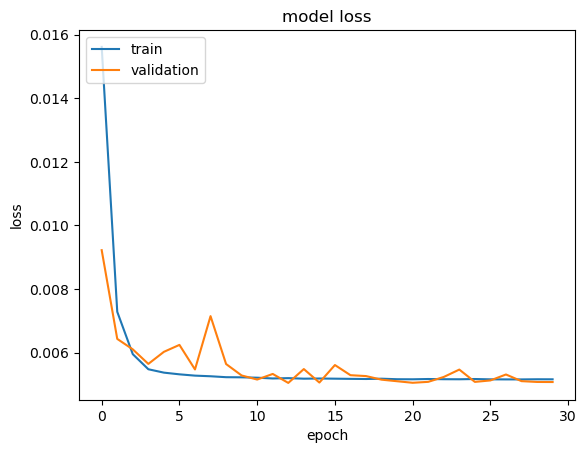

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
mean_absolute_error(y_test, y_test_pred)

0.010193427416946768

In [23]:
mean_squared_error(y_test, y_test_pred)

0.0001639554029666194

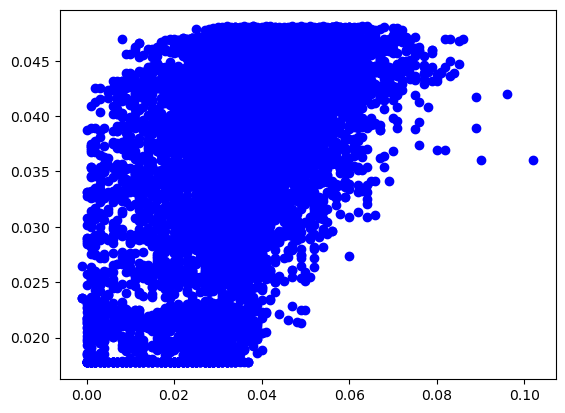

In [24]:
plt.plot(y_test,y_test_pred, 'bo')